# Keras Deep Learning Basic

In [1]:
from keras. datasets import mnist
from keras.utils import np_utils
from keras import models, layers

(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()

Using TensorFlow backend.


In [3]:
print(train_images.ndim) #축의 개수 3D Tensor
print(train_images.dtype)
print(train_images.shape)
print(train_labels.shape)
print(len(train_labels))

print(test_images.shape)
print(len(test_labels))
print(test_labels)

3
uint8
(60000, 28, 28)
(60000,)
60000
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [96]:
train_images = train_images.reshape(60000, 28*28).astype('float32')/255.0
train_labels = np_utils.to_categorical(train_labels) #DNN에서 output nodes의 개수 = class label개수이기 때문에 ex) 정답 5일 경우 00001000
test_images = test_images.reshape(10000, 28*28).astype('float32')/255.0
test_labels = np_utils.to_categorical(test_labels)

network = models.Sequential()
network.add(layers.Dense(units=512, activation='relu', input_shape=(28*28, ))) ##hidden layer 추가하면 됨!
network.add(layers.Dense(units=10, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=1, batch_size=128) #bath size? #보통 epoch 10이상 #1 epoch에서 128개씩 w업데이트해 6만개까지!
#60000개를 128개씩 나눠! ->  128개가 들어갈 때마다 loss계산해서 w업데이트 
#한 조각(128개) = mini batch

loss_and_metrics = network.evaluate(test_images, test_labels)

print('loss_and_metrics: ', loss_and_metrics) #layer 3개인데도 정확도 높음 

Epoch 1/1
10000/10000 [==============================] - 1s 81us/step
loss_and_metrics:  [0.132631373648718, 0.9623]


In [49]:
pred = network.predict(test_images[0:1]) #하나에 대해서 예측 
#print("예측: %.2f, 정답: %d" % pred, test_labels[0])
print(test_labels)  #첫번째이미지 7 두번째 2 세번째 1이라는 정답!

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(28, 28)


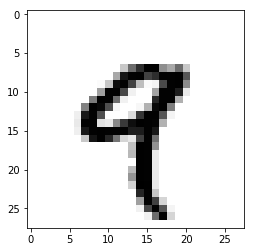

In [79]:
(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()

digit = train_images[4]
print(digit.shape)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [85]:
import numpy as np

def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max (x[i, j], 0)
    return x

x = np.array([[-10, 2, 5, -3, 4], 
                               [100, 25, 3, 4, 5],
                               [-1, 2, -3, 0, -5]])

print(naive_relu(x))

[[  0   2   5   0   4]
 [100  25   3   4   5]
 [  0   2   0   0   0]]


In [90]:
# broadcasting
x = np.random.random((4, 3, 2))
y = np.random.random((3, 2))
z = np.maximum(x, y)

#print(x)
#print("---")
#print(y)
#print("---")
#print(z)

In [92]:
(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()
print(train_images.shape)
train_images = train_images.reshape((60000, 28 * 28))
print(train_images.shape)

(60000, 28, 28)
(60000, 784)


# Softmax 함수

In [95]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
y = exp_a/sum_exp_a
print(y)
print(np.sum(y))

[ 1.34985881 18.17414537 54.59815003]
[0.01821127 0.24519181 0.73659691]
1.0


# Binary Classification (Sentiment Analysis)

In [102]:
# from keras.datasets import imdb
from keras.datasets import imdb
# imdb dataset: 50000개의 영화리뷰 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


In [105]:
print(train_labels[0]) # negative: 0 , positive: 1
print(train_data[0])

1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
word_index = imdb.get_word_index()

In [118]:
reverse_word_index = dict( [ (value, key) for (key, value) in word_index.items()])
    
#for i in range(1000, 1200):
#    print (i, reverse_word_index.get(i))

In [119]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [120]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [125]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # shape가 (25000, 10000)인 results 객체 생성, 초기값은 모두 0
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.      # i번째 데이터에 대하여, 해당 단어에 대한 index가 1, 14, 22, ... 이면 =>  (i, 1), (i, 14), (i, 22) 셀의 값이 1로 셋팅됨 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [136]:
print(x_train.shape)
print(x_test.shape)
print(train_data[0]); print(x_train[0])
print(test_data[0]); print(x_test[0])

(25000, 10000)
(25000, 10000)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[0. 1. 1. ... 0. 0. 0.]
[1, 59

In [132]:
print(train_labels)
print(len(train_labels))
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train)

[1 0 0 ... 0 1 0]
25000
[1. 0. 0. ... 0. 1. 0.]


In [150]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
                            loss='binary_crossentropy',          # loss 함수를 무엇으로 할 것인가?  mean_squared_error 또는 binary_crossentropy 또는 ...
                            metrics=['accuracy'])

#### *Crossentropy* is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

In [139]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),   # RMSprop의 최적화 모듈의 내부 parameter를 조정하여 tuning 가능
                                loss='binary_crossentropy',
                                metrics=['accuracy'])

### *Validation data* : 학습과정에서 각 epoch마다 생성된 모델을 평가하기 위해 마련함
- 기본적으로 모델에 참여하지 않은 데이터를 가지고 모델을 평가하는 것이 공정함

In [147]:
x_val = x_train[:10000] ; partial_x_train = x_train[10000:]
y_val = y_train[:10000] ; partial_y_train = y_train[10000:]

In [157]:
model.compile(optimizer='rmsprop',
                                loss='binary_crossentropy',
                                metrics=['acc'])
clf = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512,  validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 4s 262us/step - loss: 0.2224 - acc: 0.9208 - val_loss: 0.2957 - val_acc: 0.8809
Epoch 2/10
15000/15000 [==============================] - 3s 220us/step - loss: 0.1649 - acc: 0.9439 - val_loss: 0.2770 - val_acc: 0.8904
Epoch 3/10
15000/15000 [==============================] - 3s 208us/step - loss: 0.1382 - acc: 0.9565 - val_loss: 0.2889 - val_acc: 0.8863
Epoch 4/10
15000/15000 [==============================] - 3s 206us/step - loss: 0.1103 - acc: 0.9655 - val_loss: 0.3342 - val_acc: 0.8760
Epoch 5/10
15000/15000 [==============================] - 3s 209us/step - loss: 0.0917 - acc: 0.9732 - val_loss: 0.3166 - val_acc: 0.8832
Epoch 6/10
15000/15000 [==============================] - 3s 211us/step - loss: 0.0770 - acc: 0.9773 - val_loss: 0.3507 - val_acc: 0.8808
Epoch 7/10
15000/15000 [==============================] - 3s 200us/step - loss: 0.0633 - acc: 0.9829 - val_loss: 0.3879 - 

In [158]:
history_dict = clf.history
history_dict.items()

dict_items([('val_loss', [0.29572431449890135, 0.2769608953952789, 0.28893506326675417, 0.33421293926239015, 0.3165882429599762, 0.35069416522979735, 0.3879179232597351, 0.3918500630378723, 0.4213141543388367, 0.4481583708763123]), ('val_acc', [0.8809000000953674, 0.8904000002861023, 0.8863, 0.876, 0.8831999998092651, 0.8807999997138977, 0.8768999999046325, 0.8765999995231628, 0.874499999332428, 0.8738999996185303]), ('acc', [0.9208000001271566, 0.9438666666348775, 0.9564666669527689, 0.9655333334604899, 0.9731999997138977, 0.977266666730245, 0.9828666665712993, 0.9850666665712993, 0.9878666665712993, 0.9932000002543131]), ('loss', [0.2224183527469635, 0.16486807993253072, 0.13816434117158255, 0.11026724510192872, 0.09169301500717798, 0.07703633316755294, 0.0632995248277982, 0.053634127668539686, 0.04486762619018555, 0.03141945470372836])])

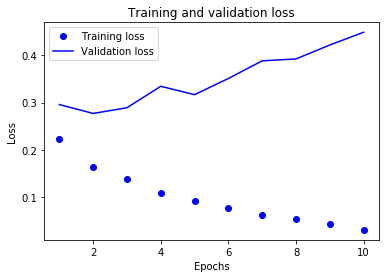

In [159]:
import matplotlib.pyplot as plt
history_dict = clf.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')             # training loss는 '원'으로 표시
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')    # validation loss는 '선'으로 표시
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

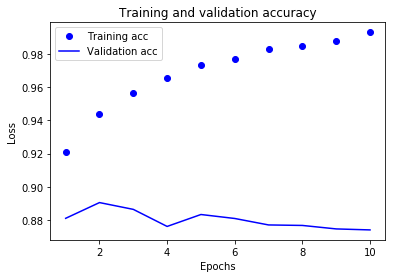

In [161]:
plt.clf()   # clear the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### epoch = 4에서 overfitting 발생
- epoch = 3 을 초과하여 학습하지 않는 것이 바람직함

In [162]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 190us/step - loss: 0.4542 - acc: 0.8192
Epoch 2/4
25000/25000 [==============================] - 4s 142us/step - loss: 0.2628 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 4s 147us/step - loss: 0.2035 - acc: 0.9276
Epoch 4/4
25000/25000 [==============================] - 6s 232us/step


In [163]:
model.predict(x_test)

array([[0.12742186],
       [0.9994517 ],
       [0.56680185],
       ...,
       [0.07348107],
       [0.03411835],
       [0.38255924]], dtype=float32)

In [166]:
max(max(train_data))

9995

# Multiple-class Classification with Reuters dataset

In [167]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [170]:
print(len(train_data)); print(len(test_data))

8982
2246


In [171]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [172]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 4s 7us/step


In [173]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [177]:
for i in train_labels[:5]:
    print(i)

3
4
3
4
4


### 학습을 위한 데이터 준비 : 입력데이터

In [186]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence] = 1.
        return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### 학습을 위한 데이터 준비 : 출력데이터 => One-hot encoding (categorical encoding)

In [187]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [188]:
print(one_hot_test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [189]:
# 이미 Keras에서는  one-hot encoding 함수를 지원하고 있음
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### DNN 설계: hidden layer의 개수는 몇 개? 각 Hidden layer의 node개수는 몇 개?

In [190]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # Input layer의 노드 개수는 입력 벡터의 성분 개수와 일치해야 함
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))   # Output layer의 노드 개수는 46개: class 개수와 일치해야 함
# output[i] is the probability that the sample belongs to class i.

In [191]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', # measures the distance between two probability distributions
                metrics=['accuracy'])

In [192]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [193]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 354us/step - loss: 2.4981 - acc: 0.4905 - val_loss: 1.6822 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 2s 200us/step - loss: 1.3929 - acc: 0.7033 - val_loss: 1.2799 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 2s 209us/step - loss: 1.0487 - acc: 0.7695 - val_loss: 1.1184 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 2s 238us/step - loss: 0.8244 - acc: 0.8272 - val_loss: 1.0222 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 2s 260us/step - loss: 0.6596 - acc: 0.8633 - val_loss: 0.9728 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 2s 218us/step - loss: 0.5250 - acc: 0.8928 - val_loss: 0.9206 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 2s 209us/step - loss: 0.4287 - acc: 0.9114 - val_loss: 0.9124 - val_acc: 0.8040


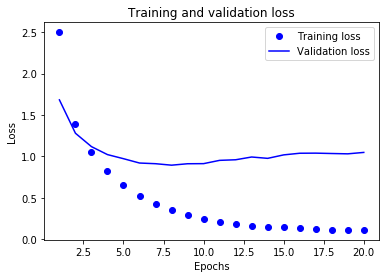

In [194]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

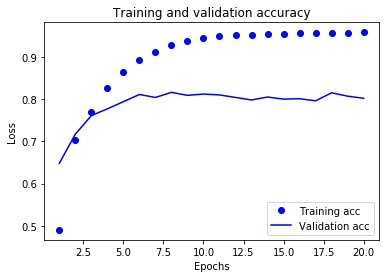

In [195]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [196]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val)) # epoch = 9로 설정하여 재학습

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 298us/step - loss: 2.5386 - acc: 0.5228 - val_loss: 1.6738 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 205us/step - loss: 1.3717 - acc: 0.7116 - val_loss: 1.2761 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 209us/step - loss: 1.0148 - acc: 0.7789 - val_loss: 1.1326 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 197us/step - loss: 0.7992 - acc: 0.8245 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 203us/step - loss: 0.6405 - acc: 0.8632 - val_loss: 0.9747 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 2s 206us/step - loss: 0.5133 - acc: 0.8918 - val_loss: 0.9104 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 2s 209us/step - loss: 0.4136 - acc: 0.9139 - val_loss: 0.8942 - val_acc: 0.8210
Epoch 8

In [207]:
results = model.evaluate(x_test, one_hot_test_labels)
print("손실값 loss: ", results[0], ", 정확도 accuracy: ", results[1]) 

2246/2246 [==============================] - 0s 198us/step
손실값 loss:  1.021839728444576 , 정확도 accuracy:  0.7782724844698171


- 46개 클래스에 대한 자동 분류 정확도가 80%에 가까운 것은 상당히 높은 수준임

In [208]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [212]:
predictions = model.predict(x_test)

print("테스트 데이터 shape: ", x_test.shape)
print("예측결과 shape: ", predictions.shape)
print(predictions[0])
print("Sum: ", np.sum(predictions[0]))
print(np.argmax(predictions[0]))
print(predictions[0][3])

테스트 데이터 shape:  (2246, 10000)
예측결과 shape:  (2246, 46)
[9.7036391e-06 8.3216917e-05 2.7830243e-05 9.7298795e-01 1.5039995e-02
 1.2353176e-07 1.0837045e-04 3.4213375e-05 3.6581643e-03 2.2200679e-06
 3.5730885e-05 1.4473418e-03 5.7975496e-05 3.0032148e-05 5.2202886e-06
 1.8679744e-05 9.5829461e-04 2.0881165e-04 3.1683160e-04 1.2523143e-03
 8.2401844e-04 5.0994579e-04 7.5777198e-06 6.3548599e-05 1.1882981e-05
 3.1294816e-04 2.8300426e-06 2.7801698e-05 7.7092463e-06 1.0940306e-04
 3.3912424e-04 1.8460772e-04 1.2370942e-05 4.4053435e-05 3.7108068e-05
 2.1978234e-05 1.7865990e-04 4.9455273e-05 9.7530108e-05 3.0139787e-04
 3.9525599e-05 4.8450276e-04 2.3573032e-06 3.0972977e-05 6.3740613e-06
 9.6551676e-06]
Sum:  1.0000004
3
0.97298795


### Hidden layer의 노드 수가 상대적으로 적으면, ...

In [213]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 383us/step - loss: 2.6672 - acc: 0.3695 - val_loss: 1.9826 - val_acc: 0.5100 - loss: 2.8388 - acc
Epoch 2/20
7982/7982 [==============================] - 2s 292us/step - loss: 1.6754 - acc: 0.6138 - val_loss: 1.5464 - val_acc: 0.6250
Epoch 3/20
7982/7982 [==============================] - 2s 290us/step - loss: 1.3370 - acc: 0.6676 - val_loss: 1.3965 - val_acc: 0.6770
Epoch 4/20
7982/7982 [==============================] - 3s 315us/step - loss: 1.1447 - acc: 0.7261 - val_loss: 1.3212 - val_acc: 0.6970
Epoch 5/20
7982/7982 [==============================] - 3s 317us/step - loss: 1.0119 - acc: 0.7454 - val_loss: 1.2665 - val_acc: 0.7040
Epoch 6/20
7982/7982 [==============================] - 2s 293us/step - loss: 0.9101 - acc: 0.7568 - val_loss: 1.2730 - val_acc: 0.7090
Epoch 7/20
7982/7982 [==============================] - 2s 298us/step - loss: 0.8297 - acc: 0.7730 - val_loss: 1.26

## Regression with the Boston Housing Price dataset : 집 값 예측

In [214]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [216]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [218]:
train_targets[:5]  # 1970년대 Boston 집 가격: 15.2 * $1000

array([15.2, 42.3, 50. , 21.1, 17.7])

- 데이터 정규화 필요 : Z-scoring 활용 (학습데이터의 평균 및 표준편차 이용)  $z = \frac{x-\mu}{\sigma}$

In [219]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [220]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # activation 함수 없음. 임의의 값 (집 값)을 출력
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])   # mse: mean squared error , regression을 위해 흔히 사용하는 loss 함수
    return model

- Cross Validation 활용

In [222]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
print(num_val_samples)

101


In [223]:
for i in range(k):
    print('processing fold #', i)
    val_data       = train_data     [i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data      = np.concatenate([train_data      [ : i * num_val_samples],      train_data[(i + 1) * num_val_samples :  ]], axis=0)
    partial_train_targets = np.concatenate([train_targets[ : i * num_val_samples], train_targets[(i + 1) * num_val_samples : ]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [224]:
print(all_scores)
print(np.mean(all_scores))

[2.064274267394944, 2.2335381791143134, 2.9516372869510463, 2.4250123624754423]
2.4186155239839366


In [225]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), 
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [246]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

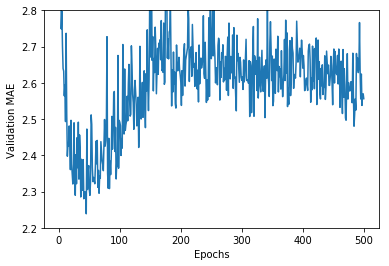

In [269]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.ylim(2.2, 2.8)
plt.show()

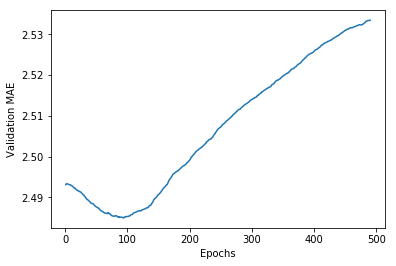

In [257]:
def smooth_curve(points, factor=0.999):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [262]:
model = build_model()
model.fit(train_data, train_targets, epochs=85, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 3ms/step


In [263]:
test_mae_score

2.6587407635707483

In [233]:
results = model.predict(test_data)

In [241]:
import numpy as np

for i in range(len(test_targets)):
    print(test_targets[i],  results[i], np.abs(test_targets[i]-results[i]))

7.2 [8.850958] [1.6509581]
18.8 [18.99149] [0.19149017]
19.0 [21.41733] [2.4173298]
27.0 [32.460064] [5.460064]
22.2 [24.358362] [2.1583614]
24.5 [21.249205] [3.2507954]
31.2 [27.188276] [4.0117245]
22.9 [21.213137] [1.686863]
20.5 [19.939726] [0.5602741]
23.2 [21.842724] [1.3572769]
18.6 [19.267265] [0.66726494]
14.5 [17.154707] [2.654707]
17.8 [16.541786] [1.258213]
50.0 [42.894367] [7.105633]
20.8 [20.160604] [0.63939476]
24.3 [18.858152] [5.441847]
24.2 [24.687273] [0.48727226]
19.8 [17.52112] [2.2788792]
19.1 [19.022024] [0.07797623]
22.7 [27.503] [4.8029995]
12.0 [11.389185] [0.61081505]
10.2 [14.417004] [4.217004]
20.0 [21.006445] [1.0064449]
18.5 [14.218787] [4.281213]
20.9 [18.139631] [2.7603683]
23.0 [25.14414] [2.1441402]
27.5 [29.739584] [2.239584]
30.1 [29.592617] [0.50738335]
9.5 [11.493132] [1.9931316]
22.0 [18.606268] [3.393732]
21.2 [19.759867] [1.440134]
14.1 [14.893814] [0.7938137]
33.1 [33.500153] [0.4001541]
23.4 [23.118723] [0.2812767]
20.1 [18.507694] [1.5923061]